# Homework 3

In this assignment, you will use word embeddings to compute the similarities between documents. 

The dataset is provided with the homework and is the same dataset that was provided with Homework 2. It contains reviews for six of the review topics used in the paper <i>John Blitzer, Mark Dredze, and Fernando Pereira: Biographies, Bollywood, Boom-boxes and Blenders: Domain Adaptation for Sentiment Classification. In Proceedings of the 45th Annual Meeting of the Association of Computational Linguistics (ACL 2007).</i> The data has been formatted so that there is one review per line, and the texts have been tokenized and normalized. 

A line in the file is organized in columns as follows:

0: <b> topic</b> category label (books, camera, dvd, health, music, or software) <br>
1: <b>sentiment</b> category label (pos or neg) <br>
2: document identifier <br>
3 and on: the actual review  <br>
    
    
Here is an example of a line:

<b>health pos 691.txt</b> <i>smaller size did not fit me or my son . it would be nice if you could use perhaps a hat size to determine right size . standard size worked fine . </i>

<b> You will use only the reviews (not the categories) for this assignment. </b>

You will need to use word embeddings for this assignment. I have provided code for using Glove Embeddings below. You may download the actual embeddings from https://nlp.stanford.edu/projects/glove/ . Note that this is a 822MB file. There are 4 different dimensional embeddings with this download (50d, 100d, 200d, 300d). The higher dimensional embeddings require more disk space but give better results. <b>I have included the 50d and 100d files with this submission, so you don't have to download the 822MB file. </b> You will only need to use ONE kind of embedding in this assignment, and you will not be penalized for using 50d. 

Alternatively, you may use other embeddings such as FastText https://fasttext.cc/docs/en/english-vectors.html . 

IMPORTANT: Your submission must be a Jupyter Notebook (.ipynb) file that is organized into sections as in this notebook file. You should edit this file to insert your answers and submit the resulting file. You can insert cells as needed, however keep your code well-organized and easy to understand.


In [167]:
# you can use the imports below
# include any other imports you need here
# you may have to install gensim using "pip install gensim"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.corpus import stopwords
import string
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [111]:
#Set global random seed
np.random.seed(1)


## Part I: Corpus - 5 Points

Write a function named <i>read_corpus</i> that takes as parameters (a) a filename for the dataset and (b) the number of lines (<i>N</i>) to be read from the file starting from the beginning of the file. The function should return the first <i>N</i> reviews as a list. The first review will be at position 0 in the list, the second review at position 1, and so on.

(1) Invoke your function with the filename of the dataset provided with this assignment and 2000 as the number of lines. Save the result in a variable named <i>corpus</i>.

(2) Print out the folowing: <br>
 (i) any two reviews <br>
 (ii) number of reviews (should be 2000)

In [165]:
# PART I: insert code for the function below
def read_corpus(filename, N=-1):
    """
    Given a filename and the number of lines N to read, return a list of the first N lines,
    Skip the first 3 tokens as they are metadata and not reviews
    """
    corpus = list()
    with open(filename) as f:
        i = 0            
        for line in f:                
            tokens = line.strip().split()
            data = tokens[3:]
            corpus.append(' '.join(data))
            i += 1

            #If N is equal to -1, we go to the end of the file. Else we read only the first N reviews
            if N > 0 and i >= N:
                break
        
                
            
    return corpus

In [31]:
# code for 
#(1) invoking the read_corpus function
#(2) generating output for  
    #(i) any two reviews 
    #(ii) number of reviews
### fill your code below this line and run this cell to SHOW YOUR OUTPUT

path_glove100d = '../data/HW3_data/glove.6B.100d.txt'
path_glove50d = '../data/HW3_data/glove.6B.50d.txt'

path_reviews = "../data/HW3_data/all_reviews.txt"
corpus = read_corpus(path_reviews,N=2000)
len(corpus)

print("REVIEW #0: ")
print(corpus[0])

print("REVIEW #2: ")
print(corpus[2])


print("# REVIEWS IN CORPUS:", len(corpus))

REVIEW #0: 
i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things .
REVIEW #2: 
i have introduced many of my ell , high school students to lois lowery and the depth of her characters . she is a brilliant writer and capable of inspir

## Part II: Embedding Vectors - 10 Points

If you are using Glove embeddings, you can use the code below to load the model and access the embeddings in the model. 

Alternatively, you can read the embeddings file (it is a text file, so you should inspect it) into word vectors in memory. 

Note that if you are using other embeddings such as FastText or directly reading the embeddings file into word vectors, you will need to write your own code and replace the code below with your code. 

In [37]:
# PART II: load word embeddings.
# If you are using the 50d or another dimensional embedding,
# you will need to replace the name of the file in the path below
glove_file = datapath('/Users/yanivbronshtein/Coding/Rutgers/NLP_Rutgers_Repo/data/HW3_data/glove.6B.100d.txt')
word2vec_text_file = get_tmpfile("glove.6B.100d.txt")
glove2word2vec(glove_file, word2vec_text_file)

/Users/yanivbronshtein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  


(400001, 100)

In [40]:
# this may take a while to load
model = KeyedVectors.load_word2vec_format(word2vec_text_file) #Gets all of the embeddings

In [52]:
# ignore the deprecated warning if you get it
# wv contains the word vectors/embeddings
comp_wv = model.get_vector('computer')

In [53]:
comp_wv

array([-1.6298e-01,  3.0141e-01,  5.7978e-01,  6.6548e-02,  4.5835e-01,
       -1.5329e-01,  4.3258e-01, -8.9215e-01,  5.7747e-01,  3.6375e-01,
        5.6524e-01, -5.6281e-01,  3.5659e-01, -3.6096e-01, -9.9662e-02,
        5.2753e-01,  3.8839e-01,  9.6185e-01,  1.8841e-01,  3.0741e-01,
       -8.7842e-01, -3.2442e-01,  1.1202e+00,  7.5126e-02,  4.2661e-01,
       -6.0651e-01, -1.3893e-01,  4.7862e-02, -4.5158e-01,  9.3723e-02,
        1.7463e-01,  1.0962e+00, -1.0044e+00,  6.3889e-02,  3.8002e-01,
        2.1109e-01, -6.6247e-01, -4.0736e-01,  8.9442e-01, -6.0974e-01,
       -1.8577e-01, -1.9913e-01, -6.9226e-01, -3.1806e-01, -7.8565e-01,
        2.3831e-01,  1.2992e-01,  8.7721e-02,  4.3205e-01, -2.2662e-01,
        3.1549e-01, -3.1748e-01, -2.4632e-03,  1.6615e-01,  4.2358e-01,
       -1.8087e+00, -3.6699e-01,  2.3949e-01,  2.5458e+00,  3.6111e-01,
        3.9486e-02,  4.8607e-01, -3.6974e-01,  5.7282e-02, -4.9317e-01,
        2.2765e-01,  7.9966e-01,  2.1428e-01,  6.9811e-01,  1.12

In [54]:
# this will correspond to the size of your embedding
len(comp_wv)

100

## Part III: Word Similarity - 10 Points

(1) Print the first 20 values in the embeddings for 2 words of your choice (these should not be <i> computer</i>).

(2) Compute and print the cosine similarity between 5 pairs of words that are close and far apart in meaning (E.g. (car, automobile) (water, digital)).

In [57]:
# insert code in this cell and below. Insert new cells as need
chess_wv = model.get_vector('chess')
style_wv = model.get_vector('style')

In [56]:
chess_wv[:20]

array([ 3.7635e-01,  5.4567e-01,  3.0534e-01,  9.0395e-01, -8.8172e-02,
        6.2945e-01,  4.0376e-01, -8.1160e-01, -1.9370e-01, -3.1395e-01,
       -1.6067e-02, -6.8291e-01, -1.2400e-02, -2.0827e-01, -1.0267e+00,
        1.4386e+00,  5.1816e-01,  2.0026e-01, -8.3672e-04, -2.9563e-01],
      dtype=float32)

In [58]:
style_wv[:20]

array([-0.10472  ,  0.48403  , -0.0086339,  0.024064 , -0.31165  ,
        0.93899  ,  0.11214  , -0.5615   , -0.81848  ,  1.3578   ,
       -0.47941  , -0.37561  , -0.035467 ,  0.26547  , -0.31471  ,
        0.69005  , -0.17193  , -0.37695  , -0.20739  , -0.30336  ],
      dtype=float32)

# Cosine Similarities

In [62]:
model.similarity('car', 'automobile')

0.68319416

In [65]:
model.similarity('skiing', 'soldering')

0.09676659

In [66]:
model.similarity('water', 'digital')

0.20361975

In [69]:
model.similarity('ice', 'hockey')

0.62254065

In [71]:
model.similarity('soccer', 'football')

0.8732221

In [73]:
model.similarity('electricity', 'tennis')

0.030391458

In [162]:
model.similarity("happy", "sad")

0.6801137

## Part IV:  Document Embeddings - 30 points

Write a function named <i>calc_doc_embedding</i> that takes the following parameters 

(1) a document (string) <br>
(2) embeddings <br>
(3) embedding size (dimensions of embedding) <br>
(4) OOV_embed (a dictionary) <br>

The function should return the embedding of the document using the centroid of the vectors of all the words in the document. The formula is given in Equation 6.23 in Section 6.7 of the Required Reading. 

Note that when you pass a document to this function, there may be words in the document that are not in the vocabulary of the embeddings such as proper nouns. You can choose to ignore out of vocabulary (OOV) words, however you may not get great results for document similarity. One approach you could try is to assign a random embedding to an OOV word when you see it for the first time and add the word and its generated embedding to the dictionary <i>OOV_embed</i>. You can then check both <i>embeddings</i> and <i>OOV_embed</i> to retrieve the embedding for a word inside the function. 

It may also help to ignore words in a stopset (you can use stopwords from nltk.corpus for this). You can use the code below for setting up a stopset. Insert a cell below to include and run this code.<br>
<i>from nltk.corpus import stopwords<br>
import string<br>
stopset = stopwords.words('english') + list(string.punctuation)</i>

In [164]:
# PART IV: insert code for function
def calc_doc_embedding(doc, embeddings, embed_size, OOV_embed):
    """
    doc:string
    embeddings: a list of vectors where each vector has 100 values
    embed_size:usually 100 but could be something else
    OOV_embed:dict where 
        key:word, 
        value: vector of 100 values that fall under the uniform distribution
    
    This function calculates the document embeddings
    """
    stopset = stopwords.words('english') + list(string.punctuation)
    matched_embeddings = list() #
    # Filter stop words from the document
    tok_doc = [i for i in doc.strip().lower().split() if i not in stopset] 
    
    unique_tok_doc = list(set(tok_doc)) #Remove duplicate words
    
    #iterate through every unique document token and create a random entry in OOV_embed if the word
    #does not exist in the embeddings or if it does not exist in OOV_embed
    for word in unique_tok_doc:
        if word in embeddings or word in OOV_embed:
            matched_embeddings.append(embeddings.get_vector(word))
        else:
            OOV_embed[word] = np.random.uniform(-1, 1, embed_size)
    
    #compute and return the centroid
    oov_values = list(OOV_embed.values())
    total_embeddings = matched_embeddings + oov_values
    mat = np.matrix(total_embeddings)
    doc_embed = np.sum(mat, axis=0)/ len(total_embeddings)
    return doc_embed
             


## Part V - Document Similarity - 5 points

Using the function <i> calc_doc_embeddings </i>, compute and print the cosine similarity for the following pairs of sentences:

(1) "I want to book a ticket", "I want to purchase a ticket"<br>
(2) "I want to book a ticket", "I want to reserve a ticket"<br>
(3) "I want to book a ticket", "I want to go golfing"<br>
(4) "I want to eat a sandwich for lunch", "I want to eat a tuna sandwich for lunch"<br>
(5) "I want to eat a fish sandwich for lunch", "I want to eat a tuna sandwich for lunch"

Before you invoke <i> calc_doc_embeddings </i> for the first time, you will need to initialize OOV_embed to an empty dictionary.

In [147]:
sentence_pairs = [
    ["I want to book a ticket", "I want to purchase a ticket"],
    ["I want to book a ticket", "I want to reserve a ticket"],
    ["I want to book a ticket", "I want to go golfing"],
    ["I want to eat a sandwich for lunch", "I want to eat a tuna sandwich for lunch"],
    ["I want to eat a fish sandwich for lunch", "I want to eat a tuna sandwich for lunch"],  
]

In [148]:
# PART V: insert code in this cell and below. Insert new cells as needed
for i in range(len(sentence_pairs)):
    print(f"({i+1}) {sentence_pairs[i]}")
    da_embed = calc_doc_embedding(sentence_pairs[i][0], model, 100, dict())
    db_embed = calc_doc_embedding(sentence_pairs[i][1], model, 100, dict())
    print("COSINE SIMILARITY:",cosine_similarity(da_embed, db_embed)[0][0])
    print("*****************************************************************")


(1) ['I want to book a ticket', 'I want to purchase a ticket']
COSINE SIMILARITY: 0.88618135
*****************************************************************
(2) ['I want to book a ticket', 'I want to reserve a ticket']
COSINE SIMILARITY: 0.8330232
*****************************************************************
(3) ['I want to book a ticket', 'I want to go golfing']
COSINE SIMILARITY: 0.7701012
*****************************************************************
(4) ['I want to eat a sandwich for lunch', 'I want to eat a tuna sandwich for lunch']
COSINE SIMILARITY: 0.9700427
*****************************************************************
(5) ['I want to eat a fish sandwich for lunch', 'I want to eat a tuna sandwich for lunch']
COSINE SIMILARITY: 0.98094356
*****************************************************************


## Part VI: Similarity in Corpus - 30 points

(1) Compute the cosine similarity of corpus[15] and all other documents and display the top 10 documents with the highest similarity. You must display BOTH the documents (reviews) and their respective scores. Corpus[15] should be the following review:

<i>the s9000 fits perfectly in the case . too bad the case has no strap and no belt loop . apparently , the camera strap is supposed to function as the case strap also . too bad the camera strap is extremely short , made for very small people . so , instead of returning it and using a generic case that would not protectthe camera as well , i will adapt the case to work for me . i will get a bigger aftermarket strap for the camera . i can take the case to my seamstress and have a belt loop sewn on . it will work but only after extensive modification . great camera design so it 's odd that the case appears to have been designed by someone who has never used a camera before</i>

(2) Plot a bar chart showing the distribution of the similarities for ALL documents in the corpus. 

In [174]:
# PART VI (1) put your code after this line and 
# run the cell to display the top 10 reviews and their similarities
# you can use multiple cells
def get_similarities_and_report(idx, corpus):
    """
    idx: index of document to compare all other documents to
    corpus: list of reviews
    This function first computes the doc_embedding for the doc of interest and then iterates through the corpus, 
    skipping the document at index idx and calculating all other doc embeddings and cosine similarities
    The top 10 report and histogram are generated
    """
    review = corpus[idx]
    review_embed = calc_doc_embedding(review, model, 100, dict())
    list_of_similarities = list()
    for i in range(len(corpus)):
        if i != idx:
            di_embed = calc_doc_embedding(corpus[i], model, 100, dict())
            cos_sim = cosine_similarity(review_embed, di_embed)[0][0]
            list_of_similarities.append(cos_sim)
    mydata = pd.DataFrame({'Cosine': cos})
    mydata = mydata.sort_values(by='Cosine', ascending=False)
    mydata.head(10)
    for i in range(10):
        print('Cosine similarity:', mydata['Cosine'].iloc[i], '\n')
        print(corpus[mydata.index[i]], '\n')
    
    plt.hist(get_list_of_similarities(15, corpus),bins=40);


Cosine similarity: 0.9686222498937276 

for average people who want a camera that just works-and takes good pics you should not buy this . i do n't know about the specifics , but like other reviewers mine got stuck and quit working for no reason after a couple of months . so , i do n't really see what all the bells and whistles are for if it does n't even take a picture . it was fine while it worked , it ate batteries but the pics were good 

Cosine similarity: 0.963819487703435 

it 's not a conflict of good and evil that drives millions ( fox ) , but rather issues of what 's right and wrong . set in the uk , this exquisite family film about two brothers , serious seven year old damien and fun-loving nine year anthony , who recently lost their mom and discover a suitcase full of british pounds has dropped out of the sky and crashed into their playhouse . and it 's only seven days before the official currency switches to euros . the brothers think it came from god and they have differi

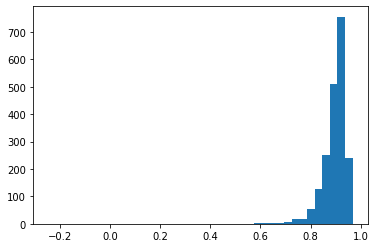

In [175]:
#(2) Plot the bar chart showing the similarities for all the documents in the corpus
# you may use the following code template:
get_similarities_and_report(15, corpus)



## Part VII - 5 points

Repeat Part VI  for another review of your choice in the corpus and show your results. 

Cosine similarity: 0.9686222498937276 

for average people who want a camera that just works-and takes good pics you should not buy this . i do n't know about the specifics , but like other reviewers mine got stuck and quit working for no reason after a couple of months . so , i do n't really see what all the bells and whistles are for if it does n't even take a picture . it was fine while it worked , it ate batteries but the pics were good 

Cosine similarity: 0.963819487703435 

it 's not a conflict of good and evil that drives millions ( fox ) , but rather issues of what 's right and wrong . set in the uk , this exquisite family film about two brothers , serious seven year old damien and fun-loving nine year anthony , who recently lost their mom and discover a suitcase full of british pounds has dropped out of the sky and crashed into their playhouse . and it 's only seven days before the official currency switches to euros . the brothers think it came from god and they have differi

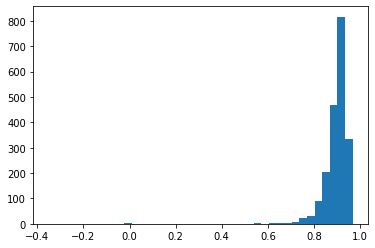

In [176]:
get_similarities_and_report(64, corpus)


## Part VIII Observations - 5 points

Write 5-10 lines describing your observations in this assignment. 

**Part III:** <br> 
Two words can be similar even if they are opposites. We can take for example Happy and Sad
<br>
**-Part V:** <br>
When we look at the examples, we see that overall, the document pairs are very similar. However,because Tuna and Sandwich occur often together, the cosine similarity for document pair 4 is higher than that of document 1 because the latter has more words.
<br>
**Part VI and VII:**<br>
We notice that the histogram  shows that most documents have similarities between 0.8 and 1.0
Very few negative similarities are observed.
One potential limiting factor is the embedding size which is 100.